In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [88]:
pip install scikeras

In [89]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
import joblib
import sys
import os
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.compose import ColumnTransformer

In [68]:
!git clone https://github.com/callmiAnggi/myModel.git

Cloning into 'myModel'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 1), reused 20 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 3.56 MiB | 4.24 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [69]:
!ls

data  Gather_dataset.py  main.py  model  myModel  testing  testing1.pkl


In [70]:
repo = '/content/myModel'
os.chdir(repo)

In [71]:
data_path = os.path.join(repo, 'data','diabetes_binary.pkl')

In [92]:
diabetes_data = pd.read_pickle(data_path)
label = 'Diabetes_binary'

In [93]:
X = diabetes_data.drop(label, axis=1)
y = diabetes_data[label]

In [74]:
print(X.shape, y.shape)

(253680, 10) (253680,)


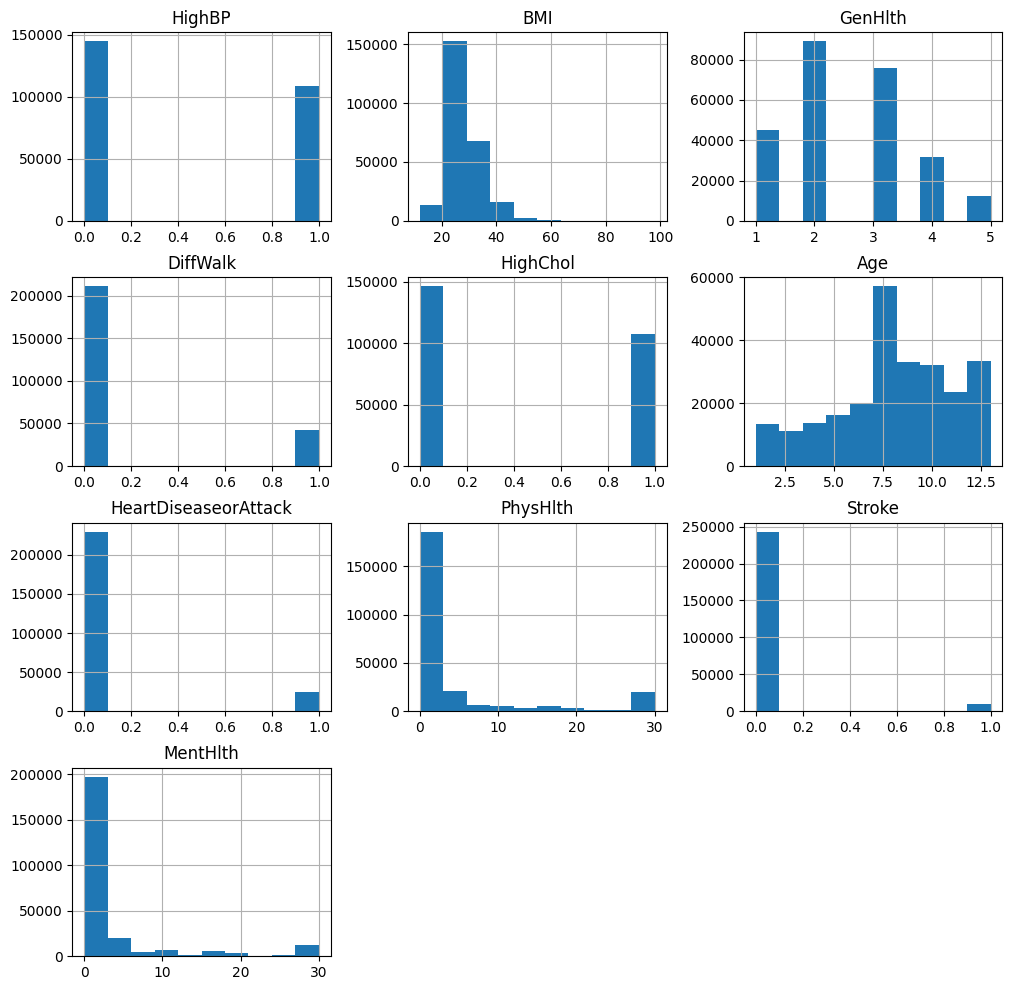

In [94]:
# distribution
X.hist(figsize=(12, 12))
plt.show()

In [95]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from imblearn.under_sampling import RandomUnderSampler
US = RandomUnderSampler(random_state=42)
X_balance, y_balance = US.fit_resample(X_train, y_train)

In [117]:
y_balance.shape , X_balance.shape

((56698,), (56698, 10))

In [118]:
y_balance.value_counts()

,count
Diabetes_binary,
0,28349
1,28349


In [119]:
sys.path.append(os.path.join(repo))
from model.create_model import createModel

In [120]:
nn_model = createModel()
input_shape = X_train.shape[1]

model = nn_model.make_nn_model(input_shape)
model.summary()
clf = KerasClassifier(build_fn=model, epochs=10)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_test.iloc[:1]

,HighBP,BMI,GenHlth,DiffWalk,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Stroke,MentHlth
219620,0,21,3,0,0,7,0,7,0,3


In [121]:
#scaler = StandardScaler()
scaler = StandardScaler()
non_binary_features = ['BMI','PhysHlth', 'MentHlth', 'GenHlth', 'Age']
#non_binary_features = ['BMI', 'PhysHlth', 'MentHlth']
#non_binary_features = ['BMI']

#binary_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'GenHlth', 'Age']
binary_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
#binary_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'GenHlth', 'Age', 'PhysHlth', 'MentHlth']

scalar_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())#StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('scal_trans', scalar_transformer, non_binary_features),
        ('binary', 'passthrough', binary_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('NeuralNet', clf)
])

In [122]:
pipeline.fit(X_balance, y_balance)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6306 - loss: 0.6288
Epoch 2/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7349 - loss: 0.5358
Epoch 3/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7391 - loss: 0.5300
Epoch 4/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7363 - loss: 0.5315
Epoch 5/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7372 - loss: 0.5308
Epoch 6/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7414 - loss: 0.5210
Epoch 7/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7427 - loss: 0.5250
Epoch 8/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7420 - loss: 0.5211
Epoch 9/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7406 - loss: 0.5235
Epoch 10/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7427 - loss: 0.5221


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scal_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'PhysHlth',
                                                   'MentHlth', 'GenHlth',
                                                   'Age']),
                                                 ('binary', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'DiffWalk'])])),
                ('NeuralNet',
                 KerasClassifier(build_fn=<Sequential name=sequential_7, built=True>, epochs=10))])

In [123]:
accuracy = pipeline.score(X_test, y_test)
print("Data Testing Accuracy:", accuracy)

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Data Testing Accuracy: 0.7102451907915484


In [57]:
reference_features = list[X.columns]

In [ ]:
import pickle
pickle.dump(pipeline, open('diabetes_model_for_non_DF.pkl','wb'))

In [58]:
#for dataframe input
joblib.dump(value=[pipeline, reference_features, label], filename='testing1.pkl')

['testing1.pkl']